### ELjenzal Hoper U. Saez

### 2ECE - C

# Python - Exploratory Data Analysis on Spotify 2023 Dataset

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:

df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

# Select specific columns and create the DataFrame
spotify_2023 = pd.DataFrame(
    df, 
    columns=['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day',
             'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
             'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%',
             'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
)

# show the first 5 and last 5 rows only
spotify_2023_first_last = pd.concat([spotify_2023.head(5), spotify_2023.tail(5)])
spotify_2023_first_last

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


In [168]:
missing_values = spotify_2023.isnull().sum()
print(missing_values[missing_values > 0])

in_shazam_charts    50
key                 95
dtype: int64


In [170]:
# Convert non-numeric entries in the 'streams' to allow numerical calculations
spotify_2023['streams'] = pd.to_numeric(spotify_2023['streams'], errors='coerce')

# Calculate statistical values for the 'streams' column
mean_streams = spotify_2023['streams'].mean()       # Mean value
median_streams = spotify_2023['streams'].median()   # Median value
std_dev_streams = spotify_2023['streams'].std()     # Standard deviation

# Display the results
print('Mean of streams:', mean_streams)
print('Median of streams:', median_streams)
print('Standard deviation of streams:', std_dev_streams)

Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.0388832


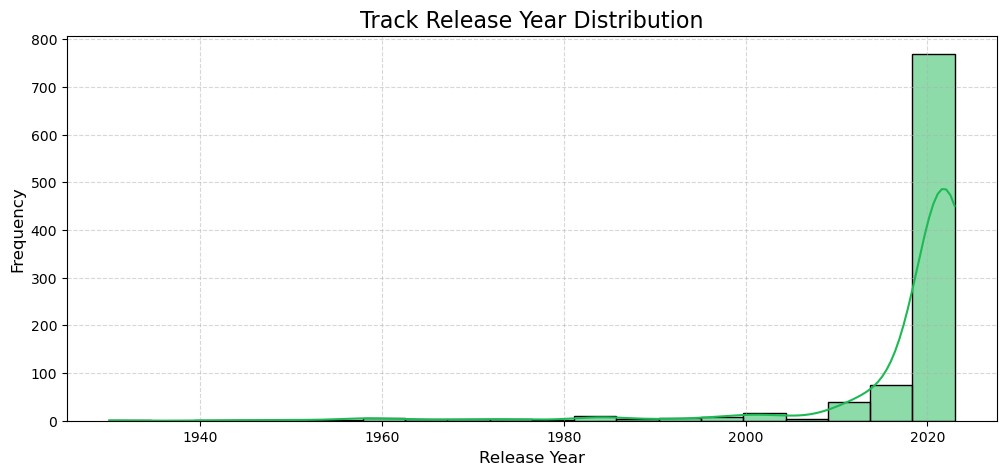

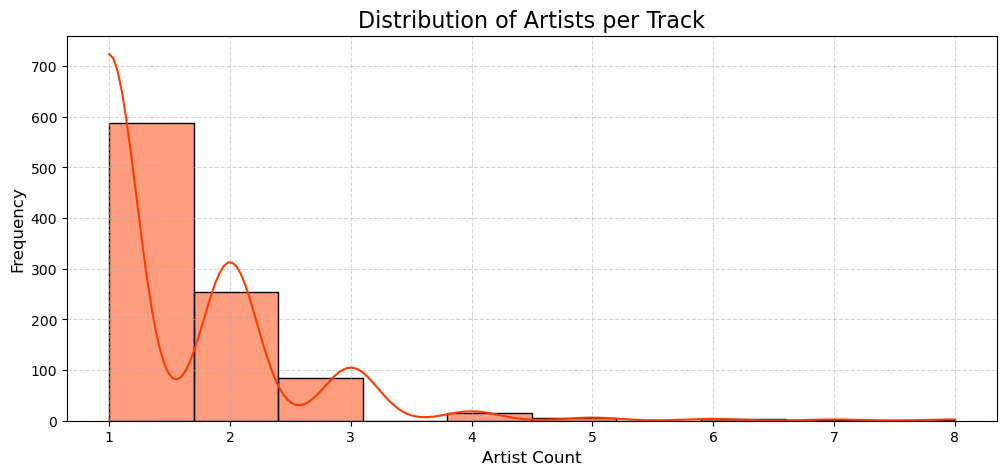

In [107]:


# Set up a figure for the distribution of track release years
plt.figure(figsize=(12, 5))  # Define figure size for better visualization

# Plot a graph for 'released_year' column with custom color
sns.histplot(data=spotify_2023, x='released_year', bins=20, kde=True, color='#1DB954')  
plt.title('Track Release Year Distribution', fontsize=16)  # Set the title of the plot
plt.xlabel('Release Year', fontsize=12)  # Label the x-axis with custom font size
plt.ylabel('Frequency', fontsize=12)     # Label the y-axis with custom font size
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines 
plt.show()  # Display the plot

# Set up a second graph for the distribution of the number of contributing artists
plt.figure(figsize=(12, 5))  # Define figure size
# Plotting 
sns.histplot(data=spotify_2023, x='artist_count', bins=10, kde=True, color='#FF3C00') # Add custom color 
plt.title('Distribution of Artists per Track', fontsize=16)  # Title for artist count distribution 
plt.xlabel('Artist Count', fontsize=12)  # Label x-axis to indicate the number of artists on each track
plt.ylabel('Frequency', fontsize=12)     # Label y-axis to represent the count of tracks
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines
plt.show()  


#### The distribution of release years shows that music from the 20th century is less represented, likely because tracks were only accessible through physical media like vinyl and CDs, rather than digital platforms. 

#### The artist count distribution reveals that most tracks are produced by single artists, while tracks with multiple artists are outliers.

## Top 5 Most Streamed Tracks

In [43]:
# Select only the columns related to track name, artist(s) name, and streams 
top_5_streamed_tracks = spotify_2023[['track_name', 'artist(s)_name', 'streams']].copy()

# Sort the DataFrame by 'streams' column in descending order to get the most streamed tracks at the top
top_5_streamed_tracks = top_5_streamed_tracks.sort_values(by='streams', ascending=False)

# Retrieve only the top 5 entries after sorting
top_5_streamed_tracks = top_5_streamed_tracks.head(5)

# Display the resulting DataFrame, which shows only track name, artist name(s), and stream counts
top_5_streamed_tracks

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


## Top 5 Most Frequent Artists based on the number of tracks

In [45]:
# Count the occurrences of each artist in the 'artist(s)_name' column to find the most frequent ones
top_5_frequent_artists = spotify_2023[['artist(s)_name']].value_counts().head(5)

# Reset the index to convert the Series into a DataFrame and make the artist names into a separate column
top_5_artists = top_5_frequent_artists.reset_index()

# Rename the column
# 'artist(s)_name' for artist names and 'count' for the frequency of appearances
top_5_artists.columns = ['artist(s)_name', 'count']

# Display the resulting DataFrame showing the top 5 most frequent artists and their counts
top_5_artists

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,SZA,19
3,Bad Bunny,19
4,Harry Styles,17


# Trends per Month/Year

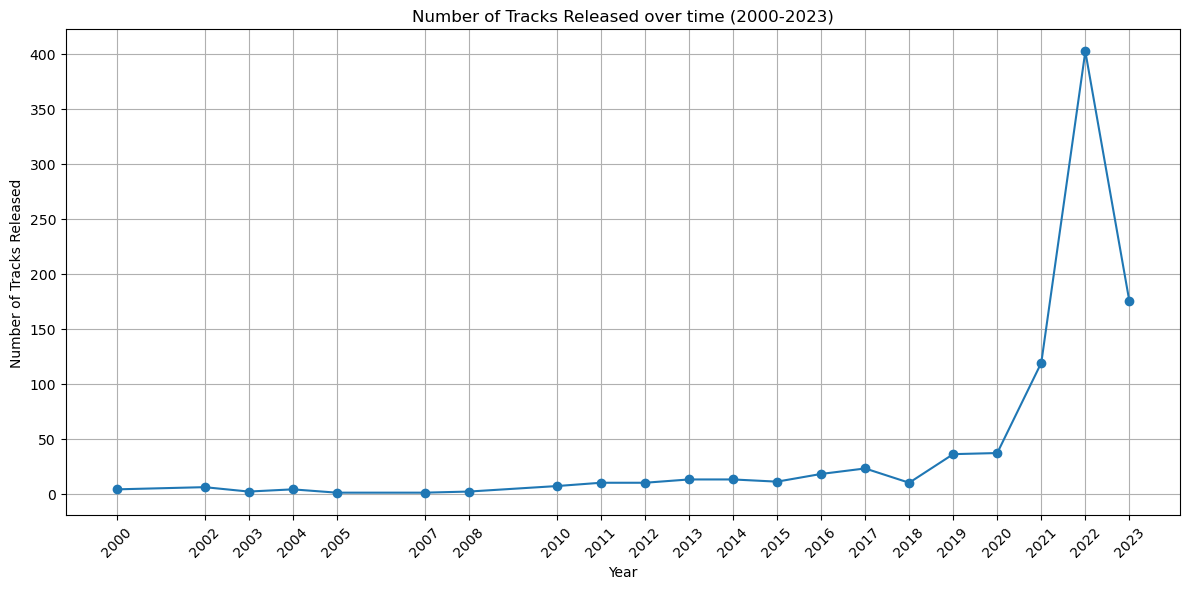

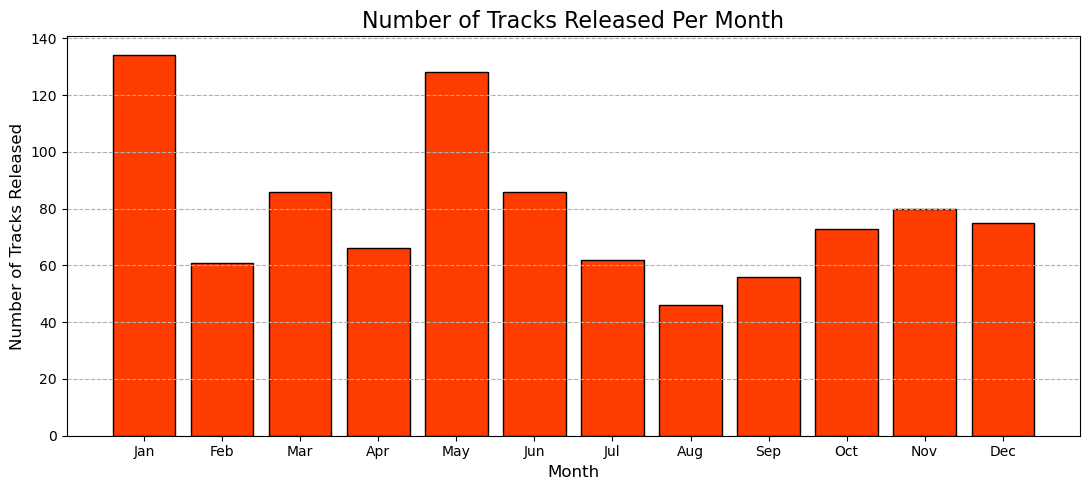

In [178]:

# For number of tracks per year
tracks_per_year = spotify_2023['released_year'].value_counts().sort_index()

#Temporal Trends
df_filtered = df[(df['released_year'] >= 2000) & (df['released_year'] <= 2023)]

# Count the number of tracks released per year
tracks_per_year = df_filtered['released_year'].value_counts().sort_index()

# Create a plot for the number of tracks released per year
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-')
plt.title('Number of Tracks Released over time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.xticks(tracks_per_year.index, rotation=45)
plt.grid()
plt.tight_layout()  # Adjust layout to make room for x-tick labels
plt.show


# For number of tracks per month
tracks_per_month = spotify_2023['released_month'].value_counts().sort_index()

plt.figure(figsize=(11, 5))  # Set figure size
# Plot the number of tracks released per month with a custom color
plt.bar(tracks_per_month.index, tracks_per_month.values, color='#FF3C00', edgecolor='black')
plt.title('Number of Tracks Released Per Month', fontsize=16)  # Add the title
plt.xlabel('Month', fontsize=12)  # x-axis label
plt.ylabel('Number of Tracks Released', fontsize=12)  # y-axis label 
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Custom month labels
plt.grid(axis='y', linestyle='--')  # Grid for y-axis with dashed lines
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Calculate the month with the most releases and its count
most_releases_month = tracks_per_month.idxmax()  # Month with the maximum number of tracks
most_releases_count = tracks_per_month.max()  # Maximum number of tracks released in a month


#### The high number of tracks released in 2022 likely reflects the recovery from the COVID-19 pandemic, allowing more artists to return to studios, and the rising popularity of digital platforms like TikTok and YouTube, which boosted music trends through dance challenges and viral content.

#### January and May has the highest track releases, likely due to listeners’ anticipation of fresh music in the new year after the holiday season, and May aligning with summer when people have more leisure time to discover and enjoy new tracks.

# Genre and Music Characteristics

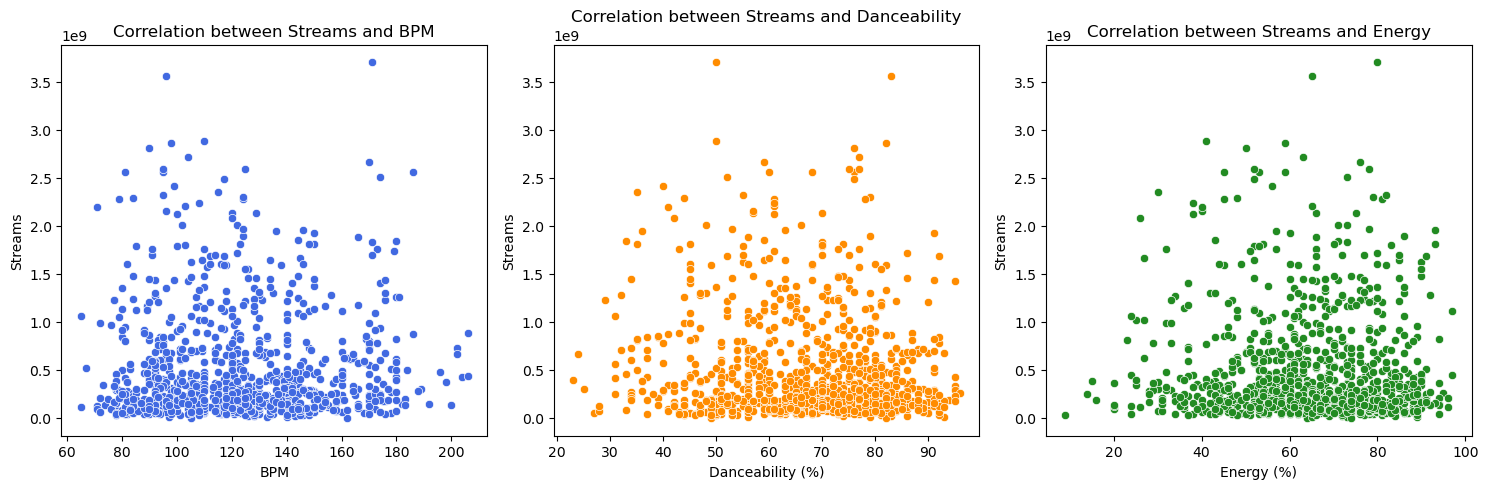

In [68]:

# Set up the figure with size 15x5 
plt.figure(figsize=(15, 5))

# Scatter plot for Correlation between Streams and BPM
plt.subplot(1, 3, 1)  # First subplot in a 1x3 grid
sns.scatterplot(x='bpm', y='streams', data=spotify_2023, color='royalblue')  # Custom color 
plt.title('Correlation between Streams and BPM')  # Title for the plot
plt.xlabel('BPM')  # X-axis label for Beats Per Minute
plt.ylabel('Streams')  # Y-axis label for the number of streams

# Scatter plot for Correlation between Streams and Danceability
plt.subplot(1, 3, 2)  # Second subplot in a 1x3 grid
sns.scatterplot(x='danceability_%', y='streams', data=spotify_2023, color='darkorange')  # Custom color 
plt.title('Correlation between Streams and Danceability')  # Title for the plot
plt.xlabel('Danceability (%)')  # X-axis label for Danceability percentage
plt.ylabel('Streams')  # Y-axis label for the number of streams

# Scatter plot for Correlation between Streams and Energy
plt.subplot(1, 3, 3)  # Third subplot in a 1x3 grid
sns.scatterplot(x='energy_%', y='streams', data=spotify_2023, color='forestgreen')  # Custom color 
plt.title('Correlation between Streams and Energy')  # Title for the plot
plt.xlabel('Energy (%)')  # X-axis label for Energy percentage
plt.ylabel('Streams')  # Y-axis label for the number of streams

# Adjust layout to prevent overlapping and make the plots fit better
plt.tight_layout()

# Show all the plots
plt.show()



## Which attribute influences the number of streams the most?
We can observe that Danceability % influences the number of streams the most.

## Information we can get from the graphs above:


#### • As the Danceability percentage rises, the number of streams tends to increase as well. However, this relationship is not strictly linear, meaning that Danceability alone does not fully determine a track's streaming popularity.



#### • There doesn't appear to be a clear or linear correlation between the number of streams and BPM (beats per minute). This suggests that BPM is not a strong predictor of a track's popularity.


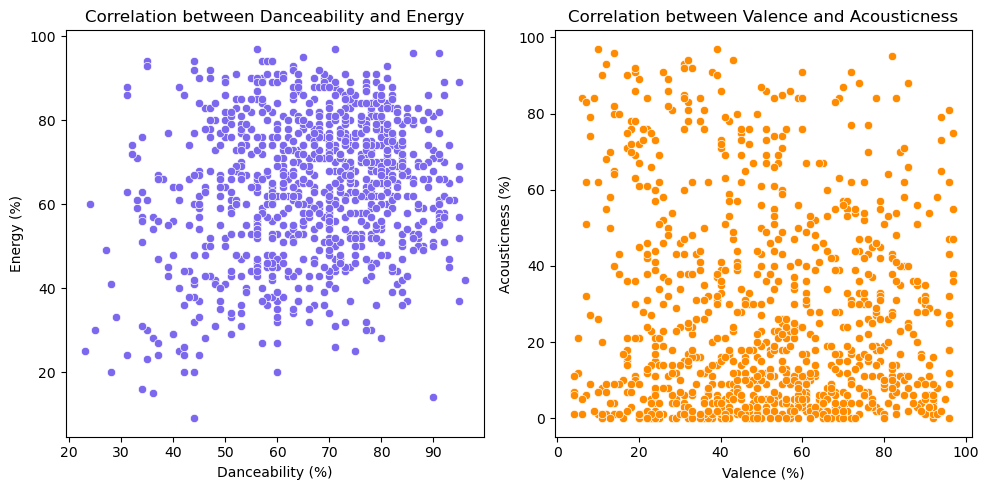

In [142]:

# Set up the figure with a size of 10x5 for two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 grid of subplots

# First subplot for Danceability vs. Energy
sns.scatterplot(ax=axes[0], x='danceability_%', y='energy_%', data=spotify_2023, color='mediumslateblue')  # Add color to the points
axes[0].set_title('Correlation between Danceability and Energy')  # Set title for the first plot
axes[0].set_xlabel('Danceability (%)')  # X-axis label for Danceability percentage
axes[0].set_ylabel('Energy (%)')  # Y-axis label for Energy percentage

# Second subplot for Valence vs. Acousticness
sns.scatterplot(ax=axes[1], x='valence_%', y='acousticness_%', data=spotify_2023, color='darkorange')  # Add color to the points
axes[1].set_title('Correlation between Valence and Acousticness')  # Set title for the second plot
axes[1].set_xlabel('Valence (%)')  # X-axis label for Valence percentage
axes[1].set_ylabel('Acousticness (%)')  # Y-axis label for Acousticness percentage

# Adjust the layout to avoid overlap and make it more readable
plt.tight_layout()

# Display the plots
plt.show()



#### The scatter plot shows a positive correlation between a track's danceability and energy levels, suggesting that tracks with higher danceability often have higher energy as well. .

# Popularity in Different Platforms

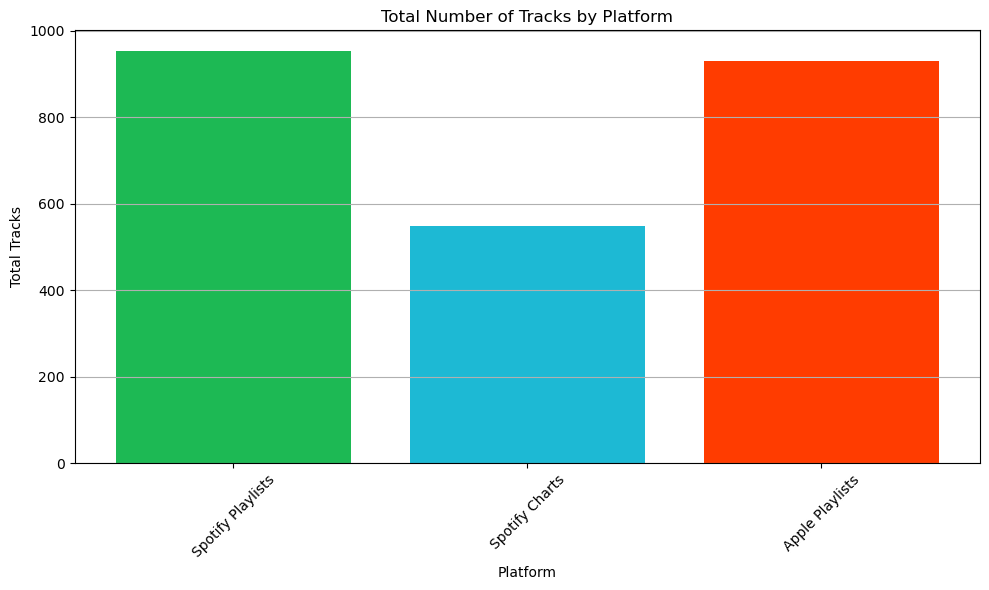

In [147]:

# Convert columns to numeric and handle non-numeric values by coercing them to NaN
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']
for column in columns_to_convert:
    spotify_2023[column] = pd.to_numeric(spotify_2023[column], errors='coerce')

# Create a list of platform columns to calculate track presence on each
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']

# Initialize an empty list to store the counts of tracks on each platform
track_counts = []

# Loop over each platform column, calculate tracks present, and append the sum of non-zero values
for column in platform_columns:
    platform_data = spotify_2023[column].value_counts()
    total_tracks = platform_data[platform_data.index > 0].sum()
    track_counts.append(total_tracks)

# Define platform names and their corresponding total track counts
platforms = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']

# Create the bar plot with specified platform colors
plt.figure(figsize=(10, 6))
plt.bar(platforms, track_counts, color=['#1DB954', '#1DB9D4', '#FF3C00'])

# Customize plot with titles and labels
plt.title('Total Number of Tracks by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout for clarity and show the plot
plt.tight_layout()
plt.show()


# Advanced Analysis (Major vs Minor)

<Figure size 1200x600 with 0 Axes>

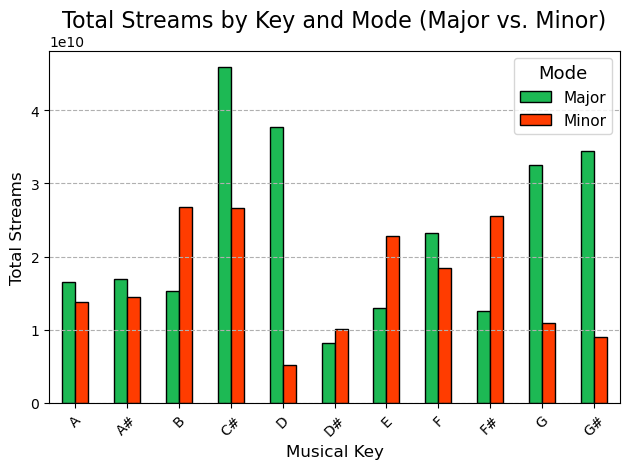

In [184]:

# Grouping by 'key' and 'mode' to sum the streams
grouped_streams = spotify_2023.groupby(['key', 'mode'], observed=False)['streams'].sum()

# Pivoting the table to have 'key' as rows and 'mode' as columns
streams_by_key_mode = grouped_streams.unstack()

# Create a figure and plot the data
plt.figure(figsize=(12, 6))  # Set figure size for the plot
streams_by_key_mode.plot(kind='bar', color=['#1DB954', '#FF3C00'], edgecolor='black')  # Specify custom colors

# Adding labels and a title for clarity
plt.title('Total Streams by Key and Mode (Major vs. Minor)', fontsize=16)
plt.xlabel('Musical Key', fontsize=12)
plt.ylabel('Total Streams', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legend and grid
plt.legend(title='Mode', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--')

# Tighten the layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [182]:

# Grouping by artist(s) name and summing the number of times they appear in Spotify playlists and charts
artist_playlist_data = spotify_2023.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()  # Summing occurrences in Spotify playlists
artist_chart_data = spotify_2023.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index()  # Summing occurrences in Spotify charts

# Merging the playlist and chart data on the artist(s)_name column to create a complete summary for each artist
artist_summary = pd.merge(artist_playlist_data, artist_chart_data, on='artist(s)_name', how='outer')  # Merge data using artist name

# Handling missing data by filling NaN values with zero, as some artists may not appear in both charts and playlists
artist_summary.fillna(0, inplace=True)  # Replace NaN values with 0 to handle missing values

# Converting counts to integers since we are working with whole numbers
artist_summary['in_spotify_playlists'] = artist_summary['in_spotify_playlists'].astype(int)  # Convert to integer type
artist_summary['in_spotify_charts'] = artist_summary['in_spotify_charts'].astype(int)  # Convert to integer type

# Sorting the data by the number of occurrences in Spotify charts (first) and playlists (second) in descending order
artist_summary_sorted = artist_summary.sort_values(by=['in_spotify_charts', 'in_spotify_playlists'], ascending=False)  # Sort in descending order

# Extracting the top 10 artists based on their presence in Spotify charts and playlists
top_10_artists = artist_summary_sorted.head(10)  # Display the top 10 artists with the most appearances in charts and playlists

# Display the top 10 artists in a table for easy visualization
top_10_artists


,artist(s)_name,in_spotify_playlists,in_spotify_charts
558,Taylor Swift,132974,542
43,Bad Bunny,51317,268
25,Arctic Monkeys,84016,190
223,Harry Styles,110026,185
572,The Weeknd,144053,180
418,NewJeans,5127,168
179,Feid,14276,165
171,Eminem,87331,152
285,Karol G,9265,149
326,"Latto, Jung Kook",553,147
